<a href="https://colab.research.google.com/github/vcbonani/Python/blob/main/Projeto_Imobiliaria_com_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo a base de dados

## Importando os dados


In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep = ';')
dados.head(10) #traz as linhas de cima da tabela

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [ ]:
dados.tail() #traz as últimas linhas da tabela

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [ ]:
type(dados)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [ ]:
dados.shape #essa função retorna uma tupla com a quantidade de linhas e a quantidade de colunas

(32960, 9)

In [ ]:
dados.columns #retorna os nomes das colunas

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [ ]:
dados.info() #traz as informações de cada coluna: quantidade de registros não-nulos e o tipo do dado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
#visualizar os dados de colunas específicas
dados[['Tipo','Quartos','Valor']]

,Tipo,Quartos,Valor
0,Quitinete,1,1700.0
1,Casa,2,7000.0
2,Conjunto Comercial/Sala,0,5200.0
3,Apartamento,1,800.0
4,Apartamento,1,800.0
...,...,...,...
32955,Quitinete,0,800.0
32956,Apartamento,3,1800.0
32957,Apartamento,2,1400.0
32958,Apartamento,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [ ]:
dados.head()
dados.groupby('Tipo').mean(numeric_only=True) #o parametro numeric_only calcula a média só para as colunas numéricas
dados.groupby('Tipo')[['Valor']].mean() #dessa forma calcula a média só para a coluna Valor

,Valor
Tipo,
Apartamento,4744.614648
Box/Garagem,1899.756098
Casa,6793.454922
Casa Comercial,14478.264151
Casa de Condomínio,11952.061245
Casa de Vila,1574.369478
Chácara,4900.000000
Conjunto Comercial/Sala,14715.045521
Flat,4546.189076


In [ ]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor') #criação de um dataframe ao informar o valor entre duplo colchete

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


<Axes: ylabel='Tipo'>

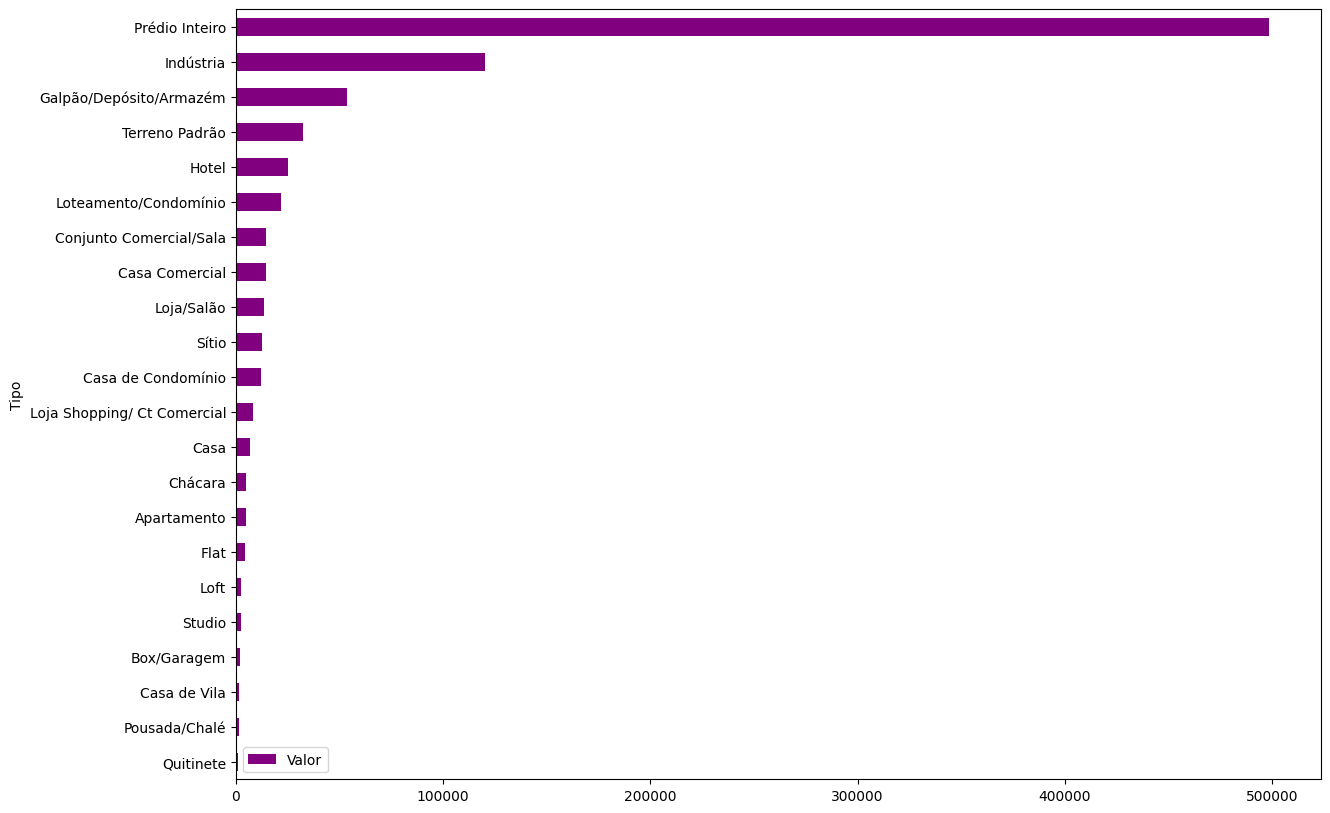

In [ ]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

#criação de gráfico
df_preco_tipo.plot(kind = 'barh', figsize = (14,10), color = 'purple')

## Removendo os imóveis comerciais

In [ ]:
dados.Tipo.unique() #visualizar as categorias únicas de uma coluna

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [ ]:
dados.query('@imoveis_comerciais in Tipo') #seleciona os registros que possuem um tipo que está dentro da lista
df_residenciais = dados.query('@imoveis_comerciais not in Tipo') #o not in exclui os registros que constam na lista do resultado da seleção
                                               #neste exemplo, temos os dados de imóveis residenciais somente sem os comerciais
df_residenciais.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

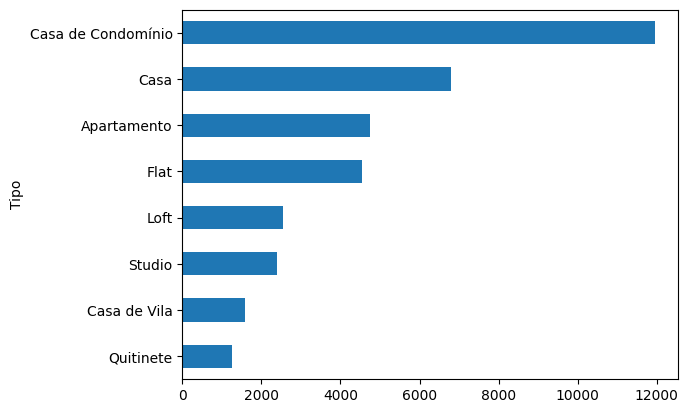

In [ ]:
df_preco_tipo = df_residenciais.groupby('Tipo')['Valor'].mean().sort_values()
df_preco_tipo.plot(kind = 'barh')

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [ ]:
df_residenciais.Tipo.value_counts() #conta a quantidade de imóveis por tipo
df_residenciais.Tipo.value_counts(normalize=True) * 100 #calcula o % de cada tipo imóvel

,proportion
Tipo,
Apartamento,84.513868
Casa de Condomínio,4.309636
Casa,4.184155
Quitinete,3.617325
Flat,2.059625
Casa de Vila,1.077409
Loft,0.220674
Studio,0.017308


In [ ]:
#cria um dataframe com os %
df_percentual_tipo = df_residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo') * 100
df_percentual_tipo.rename(columns={'proportion':'Percentuais'}, inplace = True)
df_percentual_tipo

,Percentuais
Tipo,
Apartamento,84.513868
Casa,4.184155
Casa de Condomínio,4.309636
Casa de Vila,1.077409
Flat,2.059625
Loft,0.220674
Quitinete,3.617325
Studio,0.017308


<Axes: xlabel='Tipo', ylabel='%'>

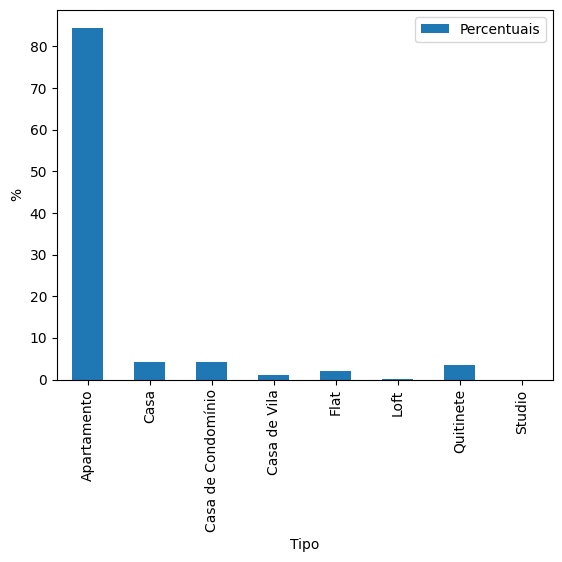

In [ ]:
#gera gráfico
df_percentual_tipo.plot(kind = 'bar', xlabel = 'Tipo', ylabel = '%')

### **Selecionando apenas os imóveis do tipo apartamento**

In [ ]:
df_residenciais.query('Tipo == "Apartamento"', inplace = True)
df_residenciais

/tmp/ipython-input-3443298833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residenciais.query('Tipo == "Apartamento"', inplace = True)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Tratando e filtrando os dados

## Lidando com dados nulos

In [ ]:
df_residenciais.isnull() #verifica quais registros possuem colunas vazias (null)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [ ]:
df_residenciais.isnull().sum() #calcula o total de valores nulos por coluna

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,7
Condominio,745
IPTU,5472


In [ ]:
#substituir os nulos por 0 (zero)
df_residenciais.fillna(0, inplace=True)

/tmp/ipython-input-1873628056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residenciais.fillna(0, inplace=True)


In [ ]:
df_residenciais.isnull().sum() #calcula o total de valores nulos por coluna

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,0
Condominio,0
IPTU,0


## Removendo registros

In [ ]:
df_residenciais.query('Valor == 0 or Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [ ]:
#obtém os índices dos registros que devem ser removidos
df_residenciais.query('Valor == 0 or Condominio == 0').index

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [ ]:
#grava os índices em uma variável
registros_a_remover = df_residenciais.query('Valor == 0 or Condominio == 0').index

In [ ]:
#remove do dataframe as linhas dos registros que possuem valor ou condominio igual a 0
df_residenciais.drop(registros_a_remover, axis = 0, inplace = True)

/tmp/ipython-input-1561611368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residenciais.drop(registros_a_remover, axis = 0, inplace = True)


In [ ]:
df_residenciais.query('Valor == 0 or Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [ ]:
#remover a coluna "Tipo" porque ela possui somente a informação de apartamento
df_residenciais.drop('Tipo', axis = 1, inplace = True)

/tmp/ipython-input-4032659366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residenciais.drop('Tipo', axis = 1, inplace = True)


In [ ]:
df_residenciais.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [ ]:
selecao_1 = df_residenciais.Quartos == 1
df_residenciais[selecao_1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [ ]:
selecao_2 = df_residenciais.Valor < 1200
df_residenciais[selecao_2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,0.0
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [ ]:
#junta as duas seleções feitas anteriormente
selecao_final = (selecao_1) & (selecao_2)
df_residenciais[selecao_final]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [ ]:
df_residenciais_1 = df_residenciais[selecao_final]

### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [ ]:
selecao = ((df_residenciais.Quartos >= 2) & (df_residenciais.Valor < 3000) & (df_residenciais.Area > 70))

In [ ]:
df_residenciais_2 = df_residenciais[selecao]

## Salvando os dados

In [ ]:
#salvar o df para um csv
# o index 'False' elimina a coluna de índice e gera um índice automático
#o parâmetro sep define o qual será o símbolo que separa as colunas
df_residenciais.to_csv('dados_apartamentos.csv', index = False, sep = ';')

In [ ]:
pd.read_csv('dados_apartamentos.csv', sep = ';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
df_residenciais_1.to_csv('dados_aptos_1.csv', index = False, sep = ';')
df_residenciais_2.to_csv('dados_aptos_2.csv', index = False, sep = ';')

In [ ]:
pd.read_csv('dados_aptos_1.csv', sep = ';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Tijuca,1,0,0,48,750.0,772.0,25.0
3,Centro,1,0,0,27,750.0,371.0,19.0
4,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
494,Grajaú,1,0,1,37,1000.0,200.0,0.0
495,Pechincha,1,0,1,69,900.0,640.0,126.0
496,Glória,1,0,0,46,1100.0,453.0,32.0
497,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [ ]:
pd.read_csv('dados_aptos_2.csv', sep = ';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
1,Tijuca,2,1,0,110,1900.0,700.0,138.0
2,Tijuca,2,1,0,78,2000.0,700.0,0.0
3,Botafogo,2,1,0,76,2500.0,740.0,0.0
4,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
4454,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
4455,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
4456,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
4457,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


# Manipulando os dados

## Criando colunas numéricas

In [ ]:
dados = pd.read_csv(url, sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [ ]:
#criando uma nova coluna chamada valor_por_mes que é a soma de 'valor' e 'condominio'
dados['valor_por_mes'] = dados.Valor + dados.Condominio
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [ ]:
#criar uma nova coluna chamada valor_por_ano que é a multiplicação de valor_por_mes por 12 somado ao valor do 'iptu'
dados['valor_por_ano'] = (dados.valor_por_mes * 12) + dados.IPTU
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

In [ ]:
dados['Descricao'] = dados.Tipo + ' em ' + dados.Bairro + ' com ' + dados.Quartos.astype(str) + ' quarto(s) e ' + dados.Vagas.astype(str) + ' vaga(s) de garagem'
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...


In [ ]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete em Centro com 0 quarto(s) e 0 vaga(s...,Não
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento em Jacarepaguá com 3 quarto(s) e 1...,Sim
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento em São Francisco Xavier com 2 quar...,Não
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,3760.0,NaN,Apartamento em Leblon com 2 quarto(s) e 0 vaga...,Não


In [ ]:
dados.to_csv('Dados_completos_dev.csv', index = False, sep = ';')